In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

In [5]:
from mlxtend.frequent_patterns import apriori, association_rules
from google.colab import files
uploaded = files.upload()

Saving Online retail.xlsx to Online retail.xlsx


In [6]:
retail=pd.read_excel('Online retail.xlsx')
retail.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,transaction id,description
0,1,"shrimp,almonds,avocado,vegetables mix,green gr..."
1,2,"burgers,meatballs,eggs"
2,3,chutney
3,4,"turkey,avocado"
4,5,"mineral water,milk,energy bar,whole wheat rice..."


In [7]:
transactions = retail[['transaction id', 'description']]
transactions.head()


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,transaction id,description
0,1,"shrimp,almonds,avocado,vegetables mix,green gr..."
1,2,"burgers,meatballs,eggs"
2,3,chutney
3,4,"turkey,avocado"
4,5,"mineral water,milk,energy bar,whole wheat rice..."


In [22]:
encoded_vals = []
for transaction in transactions['description']:
  products = transaction.split(',')
  encoded_transaction = [0] * len(set(retail['description'].sum().split(',')))
  for product in products:
    encoded_transaction[retail['description'].str.contains(product).idxmax()] = 1
  encoded_vals.append(encoded_transaction)

df_encoded = pd.DataFrame(encoded_vals)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [31]:
min_support = 0.01
frequent_itemsets = apriori(df_encoded, min_support=min_support, use_colnames=True)
min_confidence = 0.4
min_lift = 0.8

rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=min_confidence)
rules = rules[rules['lift'] >= min_lift]
association_results = pd.DataFrame(columns=['antecedents', 'consequents', 'support', 'confidence', 'lift'])
print("Association Rules:")
for idx, row in rules.iterrows():

    product_names = [retail['description'].iloc[i] for i in row['antecedents']]
    antecedents = ', '.join(product_names)


    consequents = retail['description'].iloc[list(row['consequents'])[0]]


    rule_data = pd.Series({
      'antecedents': antecedents,
      'consequents': consequents,
      'support': row['support'],
      'confidence': row['confidence'],
      'lift': row['lift']})
    association_results = pd.concat([association_results, rule_data.to_frame().T], ignore_index=True)


association_results



/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/mlxtend/frequent_patterns/fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


Association Rules:


,antecedents,consequents,support,confidence,lift
0,"burgers,meatballs,eggs","shrimp,almonds,avocado,vegetables mix,green gr...",0.161312,0.636172,1.085023
1,"turkey,avocado","shrimp,almonds,avocado,vegetables mix,green gr...",0.043861,0.701493,1.196429
2,"mineral water,milk,energy bar,whole wheat rice...","shrimp,almonds,avocado,vegetables mix,green gr...",0.150113,0.709515,1.210112
3,"whole wheat pasta,french fries","shrimp,almonds,avocado,vegetables mix,green gr...",0.125583,0.606568,1.034531
4,"soup,light cream,shallot","shrimp,almonds,avocado,vegetables mix,green gr...",0.054926,0.768657,1.310981
...,...,...,...,...,...
247,"shrimp,almonds,avocado,vegetables mix,green gr...","frozen vegetables,spaghetti,green tea",0.010399,0.509804,2.110397
248,"shrimp,almonds,avocado,vegetables mix,green gr...","mineral water,milk,energy bar,whole wheat rice...",0.010399,0.443182,2.094711
249,"shrimp,almonds,avocado,vegetables mix,green gr...","burgers,meatballs,eggs",0.010399,0.450867,1.778104
250,"frozen vegetables,spaghetti,green tea, burgers...","shrimp,almonds,avocado,vegetables mix,green gr...",0.010399,0.847826,1.446008


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


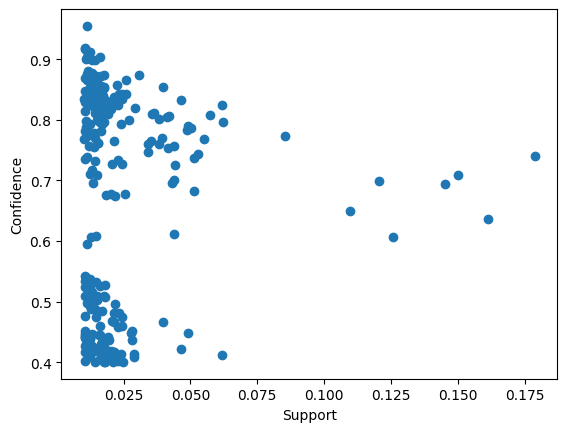

In [32]:
plt.scatter(association_results['support'],association_results['confidence'])
plt.xlabel('Support')
plt.ylabel('Confidence')
plt.show()

In [35]:
association_results.sort_values(by='lift', ascending=True)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,antecedents,consequents,support,confidence,lift
24,yogurt cake,"shrimp,almonds,avocado,vegetables mix,green gr...",0.014531,0.531707,0.906852
30,"spaghetti,mineral water,chocolate,french fries...","shrimp,almonds,avocado,vegetables mix,green gr...",0.011332,0.594406,1.013787
17,"turkey,french fries,strawberries","shrimp,almonds,avocado,vegetables mix,green gr...",0.012932,0.60625,1.033988
3,"whole wheat pasta,french fries","shrimp,almonds,avocado,vegetables mix,green gr...",0.125583,0.606568,1.034531
21,"avocado,muffins","shrimp,almonds,avocado,vegetables mix,green gr...",0.014665,0.607735,1.036521
...,...,...,...,...,...
234,"turkey,fresh tuna,tomatoes,spaghetti,mineral w...","shrimp,almonds,avocado,vegetables mix,green gr...",0.010399,0.445714,2.493142
231,"turkey,fresh tuna,tomatoes,spaghetti,mineral w...","shrimp,almonds,avocado,vegetables mix,green gr...",0.013332,0.446429,2.497137
204,"turkey,fresh tuna,tomatoes,spaghetti,mineral w...","shrimp,almonds,avocado,vegetables mix,green gr...",0.016131,0.460076,2.573475
238,"shrimp,almonds,avocado,vegetables mix,green gr...","ground beef,spaghetti,mineral water,milk,energ...",0.010665,0.43956,2.596175


In [33]:
association_results.sort_values(by='support', ascending=True)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,antecedents,consequents,support,confidence,lift
122,"parmesan cheese,spaghetti,soup,avocado,milk,fr...","shrimp,almonds,avocado,vegetables mix,green gr...",0.010132,0.835165,1.424414
110,"ground beef,spaghetti,mineral water,milk,energ...","shrimp,almonds,avocado,vegetables mix,green gr...",0.010132,0.767677,1.30931
140,"burgers,meatballs,eggs, herb & pepper,tomato s...","frozen vegetables,spaghetti,green tea",0.010399,0.52349,2.167052
250,"frozen vegetables,spaghetti,green tea, burgers...","shrimp,almonds,avocado,vegetables mix,green gr...",0.010399,0.847826,1.446008
232,"shrimp,almonds,avocado,vegetables mix,green gr...","frozen vegetables,spaghetti,green tea",0.010399,0.541667,2.242297
...,...,...,...,...,...
3,"whole wheat pasta,french fries","shrimp,almonds,avocado,vegetables mix,green gr...",0.125583,0.606568,1.034531
8,"shrimp,chocolate,chicken,honey,oil,cooking oil...","shrimp,almonds,avocado,vegetables mix,green gr...",0.145181,0.694073,1.183774
2,"mineral water,milk,energy bar,whole wheat rice...","shrimp,almonds,avocado,vegetables mix,green gr...",0.150113,0.709515,1.210112
0,"burgers,meatballs,eggs","shrimp,almonds,avocado,vegetables mix,green gr...",0.161312,0.636172,1.085023
